In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.backends.backend_pdf import PdfPages

from kernels import IonProb, IonRate, analyticalRate
from field_functions import LaserField
from __init__ import FourierTransform

class AU:
    meter = 5.2917720859e-11 # atomic unit of length in meters
    nm = 5.2917721e-2 # atomic unit of length in nanometres
    second = 2.418884328e-17 # atomic unit of time in seconds
    fs = 2.418884328e-2 # atomic unit of time in femtoseconds
    Joule = 4.359743935e-18 # atomic unit of energy in Joules
    eV = 27.21138383 # atomic unit of energy in electronvolts
    Volts_per_meter = 5.142206313e+11 # atomic unit of electric field in V/m
    Volts_per_Angstrom = 51.42206313 # atomic unit of electric field in V/Angström
    speed_of_light = 137.035999 # vacuum speed of light in atomic units
    Coulomb = 1.60217646e-19 # atomic unit of electric charge in Coulombs
    PW_per_cm2_au = 0.02849451308 # PW/cm^2 in atomic units
AtomicUnits=AU


file_params = [
    ("850nm_350nm_1.25e+14", 850, 1.25e14, 350, 1e10, 0.93, 0, -np.pi/2),
    # ("850nm_350nm_7.5e+13", 850, 7.50e13, 350, 6.00e09, 0.93, 0, -np.pi/2),
    # ("900nm_320nm_5e+14", 900, 5e14, 320, 4e10, 0.75, 0, -np.pi/2),
    # ("1200nm_320nm_1e+14", 1200, 1e14, 320, 4e10, 0.75, 0, -np.pi/2),
    # ("900nm_250nm_8e+13", 900, 8e13, 250, 6e8, 0.58, 0, -np.pi/2),
    # ("900nm_250nm_9e+13", 900, 9e13, 250, 6e8, 0.58, 0, -np.pi/2),
    # ("900nm_250nm_1e+14", 900, 1e14, 250, 6e8, 0.58, 0, -np.pi/2),
    # ("900nm_250nm_1.1e+14", 900, 1.1e14, 250, 6e8, 0.58, 0, -np.pi/2),
]

params = {'E_g': 0.5, 'αPol': 4.51, 'tau': 2.849306230484045, 'e1': 2.2807090369952894, 't0': 0.1, 't1': 3.043736601676354, 't2': 7.270940402611973, 'e2': 0, 't3': 0, 't4': 1, "div_p":2**-4, "div_theta":1}


In [2]:
for file_name, lam0_pump, I_pump, lam0_probe, I_probe, FWHM_probe, cep_pump, cep_probe in file_params:
    laser_pulses = LaserField(cache_results=True)
    laser_pulses.add_pulse(lam0_pump, I_pump, cep_pump, lam0_pump/ AtomicUnits.nm / AtomicUnits.speed_of_light)
    t_min, t_max = laser_pulses.get_time_interval()
    time_recon= np.arange(t_min, t_max+1, 1)


    ion_na_rate_SFA = IonRate(time_recon, laser_pulses, params, dT=0.25, kernel_type='exact_SFA')
    ion_na_rate_GASFIR = IonRate(time_recon, laser_pulses, params, dT=0.25, kernel_type='GASFIR')
    laser_pulses.reset()

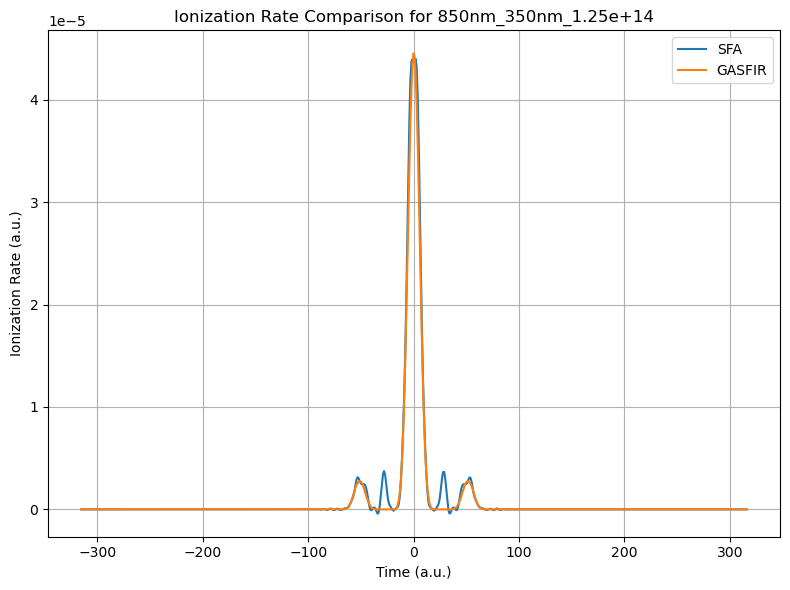

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time_recon, ion_na_rate_SFA, label='SFA')
ax.plot(time_recon, ion_na_rate_GASFIR, label='GASFIR')

ax.set_xlabel('Time (a.u.)')
ax.set_ylabel('Ionization Rate (a.u.)')
ax.set_title(f'Ionization Rate Comparison for {file_name}')
ax.legend()
plt.grid()
plt.tight_layout()

In [6]:
for file_name, lam0_pump, I_pump, lam0_probe, I_probe, FWHM_probe, cep_pump, cep_probe in file_params:
    laser_pulses = LaserField(cache_results=True)
    laser_pulses.reset()
    laser_pulses.add_pulse(lam0_pump, I_pump, cep_pump, lam0_pump/ AtomicUnits.nm / AtomicUnits.speed_of_light)
    t_min, t_max = laser_pulses.get_time_interval()
    time_recon= np.arange(t_min, t_max+1, 1)


    ion_na_rate_SFA = IonRate(time_recon, laser_pulses, params, dT=0.25/16, kernel_type='exact_SFA', excitedStates=2)
    ion_na_rate_GASFIR = IonRate(time_recon, laser_pulses, params, dT=0.25/16, kernel_type='GASFIR')
    laser_pulses.reset()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'gamma':[0m [1m[1mCannot determine Numba type of <class 'numpy.ufunc'>[0m
[1m
File "matrixElements.py", line 14:[0m
[1mdef phip_analytical_Dp(n, l, m, p, thetap, phip):
[1m    prefactor = np.sqrt(2) * (1/n)**(-3 - l) * np.sqrt(gamma(-l + n) / (n**4 * gamma(1 + l + n)))
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function phip_analytical_Dp at 0x702b359b0160>))[0m
[0m[1mDuring: typing of call at /home/user/BachelorThesis/Bachelor-thesis/ionModel/matrixElements.py (10)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function phip_analytical_Dp at 0x702b359b0160>))[0m
[0m[1mDuring: typing of call at /home/user/BachelorThesis/Bachelor-thesis/ionModel/matrixElements.py (10)
[0m
[1m
File "matrixElements.py", line 10:[0m
[1mdef dipolElement_vec(n, l, m, p, thetap, phip):
[1m    return np.array([phip_analytical_Dp(n, l, m, p, thetap, phip), phip_analytical_Dthetap(n, l, m, p, thetap, phip), phip_analytical_Dphip(n, l, m, p, thetap, phip)])
[0m    [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function dipolElement_vec at 0x702b3598bf40>))[0m
[0m[1mDuring: typing of call at /home/user/BachelorThesis/Bachelor-thesis/ionModel/kernels.py (189)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function dipolElement_vec at 0x702b3598bf40>))[0m
[0m[1mDuring: typing of call at /home/user/BachelorThesis/Bachelor-thesis/ionModel/kernels.py (189)
[0m
[1m
File "kernels.py", line 189:[0m
[1mdef exact_SFA_jit_helper_excited(tar, Tar, params, EF, EF2, VP, intA, intA2, dT, N, n, nmin, Ti_ar, p_grid, Theta_grid, window, p, theta, excitedStates, pArray, thetaArray, phiArray):
    <source elided>

[1m                dipoleElement = dipolElement_vec(1, 0, 0, pArray, thetaArray, phiArray)
[0m                [1m^[0m[0m
